In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np 
import acquire
import prepare
import explore
import modeling

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

# Allow all columns to be displayed
pd.set_option('display.max_columns', None)

In [2]:
df = acquire.acquire_data()
df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1


In [3]:
column_list= ['h1n1_concern','h1n1_knowledge', 
       'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective',
       'opinion_seas_risk',
       'opinion_seas_sick_from_vacc',
       'household_adults',
       'household_children']

In [4]:
h1n1_train, h1n1_test, seasonal_train, seasonal_test = prepare.prepare_data(df, column_list)

                         column n_nans  percentage_nans
36             seasonal_vaccine      0         0.000000
30                   census_msa      0         0.000000
29               hhs_geo_region      0         0.000000
24                          sex      0         0.000000
23                         race      0         0.000000
21                    age_group      0         0.000000
35                 h1n1_vaccine      0         0.000000
4          behavioral_face_mask     19         0.071142
5         behavioral_wash_hands     42         0.157262
2     behavioral_antiviral_meds     71         0.265848
7       behavioral_outside_home     82         0.307036
6   behavioral_large_gatherings     87         0.325757
0                  h1n1_concern     92         0.344479
1                h1n1_knowledge    116         0.434343
8         behavioral_touch_face    128         0.479275
3          behavioral_avoidance    208         0.778822
32           household_children    249         0

In [5]:
h1n1_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,encoded_employment_status,encoded_rent_or_own,encoded_marital_status,encoded_sex,age_group_18_-_34_years,age_group_35_-_44_years,age_group_45_-_54_years,age_group_55_-_64_years,age_group_65+_years,education_12_years,education_<_12_years,education_college_graduate,education_some_college,"income_poverty_<=_$75,000,_above_poverty","income_poverty_>_$75,000",income_poverty_below_poverty,race_black,race_hispanic,race_other_or_multiple,race_white,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,h1n1_concern_scaled,h1n1_knowledge_scaled,opinion_h1n1_vacc_effective_scaled,opinion_h1n1_risk_scaled,opinion_h1n1_sick_from_vacc_scaled,opinion_seas_vacc_effective_scaled,opinion_seas_risk_scaled,opinion_seas_sick_from_vacc_scaled,household_adults_scaled,household_children_scaled
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
22067,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,2.0,4.0,2.0,2.0,65+ Years,College Graduate,White,Male,"> $75,000",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Not Principle City",1.0,0.0,0,1,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.5,0.75,0.00,0.25,0.75,0.25,0.25,0.333333,0.000000
2876,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,5.0,4.0,5.0,5.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Employed,bhuqouqj,"MSA, Principle City",0.0,0.0,0,0,1,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.5,1.00,0.75,1.00,1.00,0.75,0.25,0.000000,0.000000
22939,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,3.0,4.0,2.0,4.0,2.0,2.0,45 - 54 Years,College Graduate,Other or Multiple,Female,"> $75,000",Married,Rent,Employed,mlyzmhmf,Non-MSA,2.0,1.0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.5,0.50,0.75,0.25,0.75,0.25,0.25,0.666667,0.333333
4154,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,1.0,5.0,1.0,1.0,45 - 54 Years,< 12 Years,Other or Multiple,Male,"> $75,000",Married,Rent,Employed,mlyzmhmf,"MSA, Principle City",1.0,0.0,0,0,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.5,0.75,0.00,0.00,1.00,0.00,0.00,0.333333,0.000000
23434,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,0,1,0,1,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.75,0.25,0.25,0.75,0.75,0.25,0.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0

In [6]:
seasonal_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,seasonal_vaccine,encoded_employment_status,encoded_rent_or_own,encoded_marital_status,encoded_sex,age_group_18_-_34_years,age_group_35_-_44_years,age_group_45_-_54_years,age_group_55_-_64_years,age_group_65+_years,education_12_years,education_<_12_years,education_college_graduate,education_some_college,"income_poverty_<=_$75,000,_above_poverty","income_poverty_>_$75,000",income_poverty_below_poverty,race_black,race_hispanic,race_other_or_multiple,race_white,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,h1n1_concern_scaled,h1n1_knowledge_scaled,opinion_h1n1_vacc_effective_scaled,opinion_h1n1_risk_scaled,opinion_h1n1_sick_from_vacc_scaled,opinion_seas_vacc_effective_scaled,opinion_seas_risk_scaled,opinion_seas_sick_from_vacc_scaled,household_adults_scaled,household_children_scaled
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
22862,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,45 - 54 Years,< 12 Years,Hispanic,Male,"<= $75,000, Above Poverty",Married,Rent,Not in Labor Force,kbazzjca,Non-MSA,0.0,0.0,0,1,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.00,0.00,0.00,0.00,0.25,0.00,0.000000,0.000000
20471,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,2.0,5.0,4.0,1.0,18 - 34 Years,College Graduate,Other or Multiple,Male,"> $75,000",Not Married,Own,Not in Labor Force,fpwskwrf,"MSA, Not Principle City",2.0,0.0,0,1,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.75,0.75,0.25,1.00,0.75,0.00,0.666667,0.000000
11401,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,5.0,5.0,4.0,4.0,4.0,18 - 34 Years,< 12 Years,Hispanic,Female,Below Poverty,Married,Rent,Not in Labor Force,atmpeygn,"MSA, Not Principle City",1.0,2.0,0,1,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.5,1.00,1.00,1.00,0.75,0.75,0.75,0.333333,0.666667
15821,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,2.0,5.0,5.0,4.0,55 - 64 Years,College Graduate,Other or Multiple,Female,"> $75,000",Not Married,Rent,Not in Labor Force,lzgpxyit,"MSA, Principle City",0.0,0.0,1,1,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,1.0,0.75,0.00,0.25,1.00,1.00,0.75,0.000000,0.000000
3711,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,5.0,4.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,1,0,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.50,0.00,0.00,1.00,0.75,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16297,1.0,1.0,0.0,1.0,0.0,1.

In [7]:
# #Set figure size and figure size for all plots
# plt.rc("figure", figsize = (14,14))
# plt.rc("font", size=16)

# Explore

In this notebook I will:
- Establish my initial hypothesis
- Explore both sets of data to determine which features have the most influence on vaccination status for the respective vaccines
- Visualize any interesting relationships
- Perform hypothesis testing to determine strength and validity of relationships

_**All visualizations will be accompanied by explanations and key takeaways**_

## Start with the h1n1 vaccine
- I'll explore each vaccine separately to see if there are any trends specific to one vaccine over the other

In [8]:
# How many people got the vaccine?
h1n1_train.h1n1_vaccine.value_counts()

0    16826
1     4539
Name: h1n1_vaccine, dtype: int64

In [9]:
percent_vaccinated = (h1n1_train.h1n1_vaccine.value_counts()[1]/h1n1_train.shape[0])*100

In [10]:
percent_vaccinated

21.245026913175753

- In this case 0 indicated the patient did not recieve the vaccine, 1 indicates they did recieve the vaccine.
- __Only 21% of the people in this data set were vaccinated__

Text(0.5, 1.0, "Distirbution of Patients' Vaccine Status")

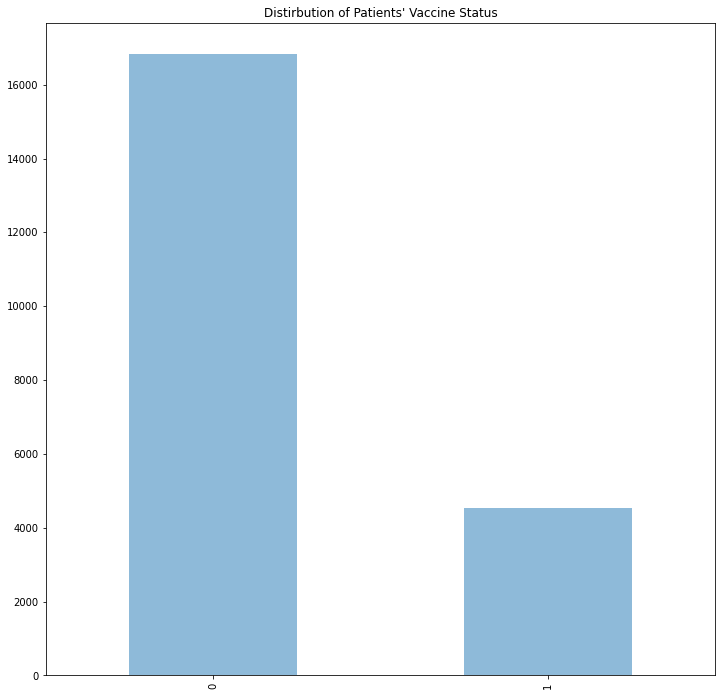

In [11]:
#Plot the distribution on of vaccine status
plt.figure(figsize=(12,12))
h1n1_train.h1n1_vaccine.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Distirbution of Patients' Vaccine Status")


### Key Takeaway^^
- Visual depiction of the fact that only 21% of the participants were vaccinated. Also important to note that when we did the train test split, we stratified the y variable, meaning the same proportion of people were vaccinated in the whole data set is equal to the proportion of vaccinated people in our training set. 

- Let's look at how certain demographic features relate to the overall vacination rate

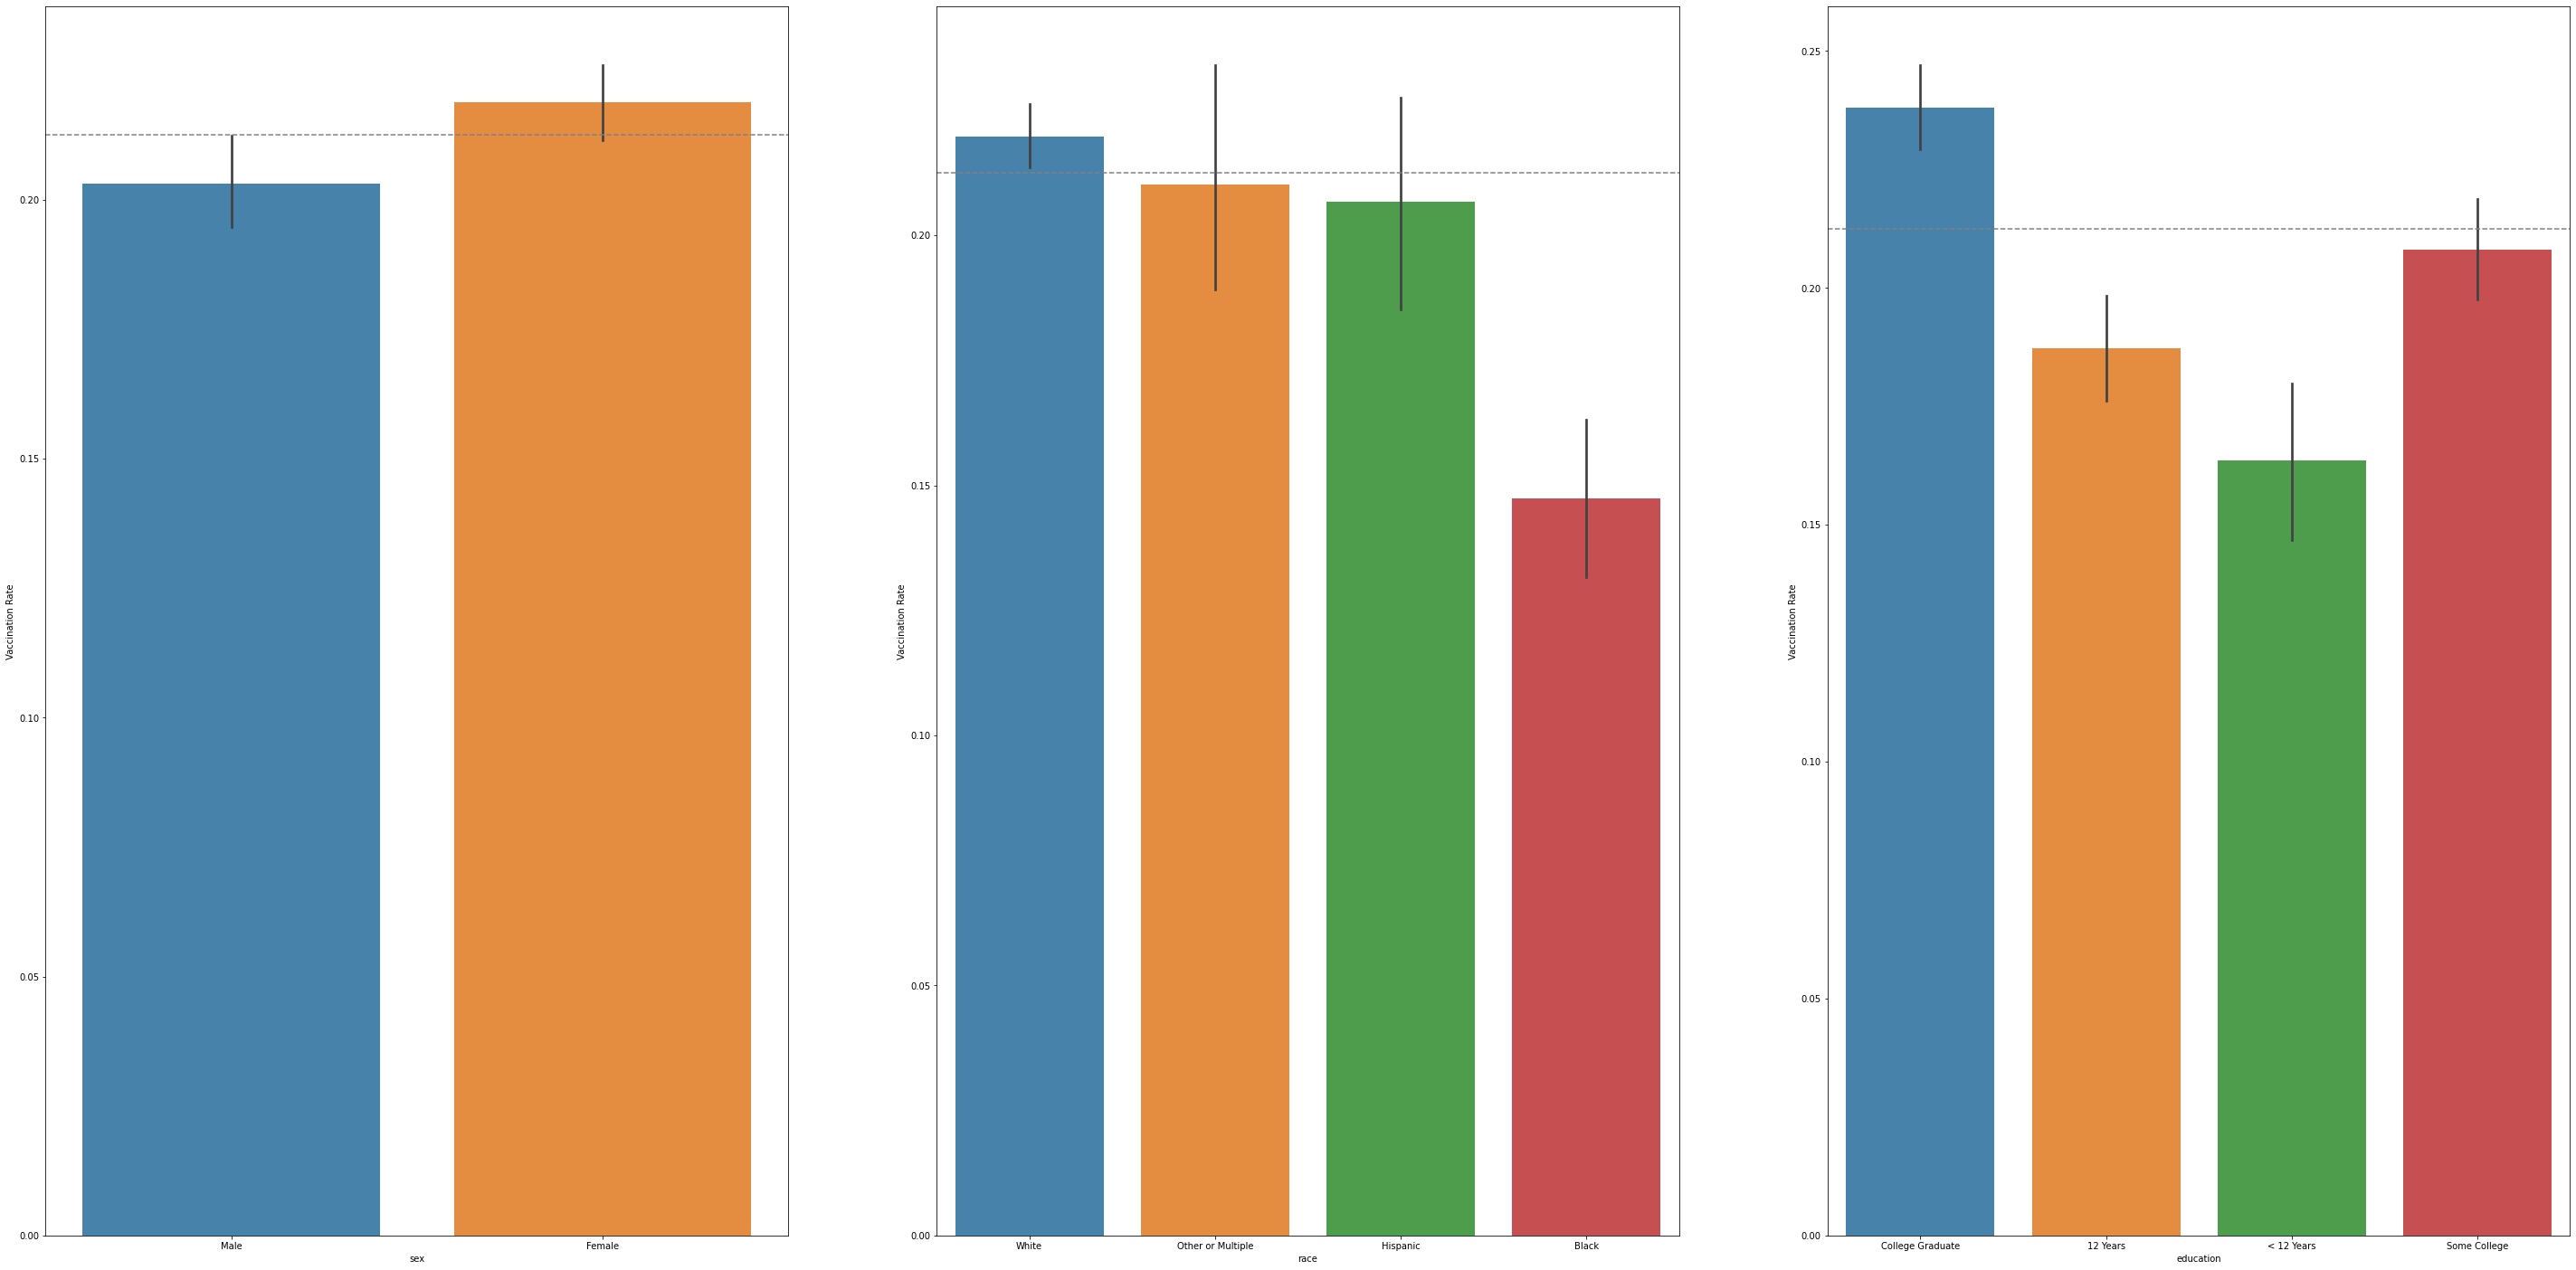

In [12]:
features = ['sex', 'race', 'education']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(50,25))

vaccination_rate = h1n1_train.h1n1_vaccine.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'h1n1_vaccine', data=h1n1_train, ax=ax[i], alpha=.9)
    ax[i].set_ylabel('Vaccination Rate')
    ax[i].axhline(vaccination_rate, ls='--', color='grey')

### Key Takeaway ^^
- From these basic barplots, it looks like college graduated, white women get vaccinated above the average vaccination rate

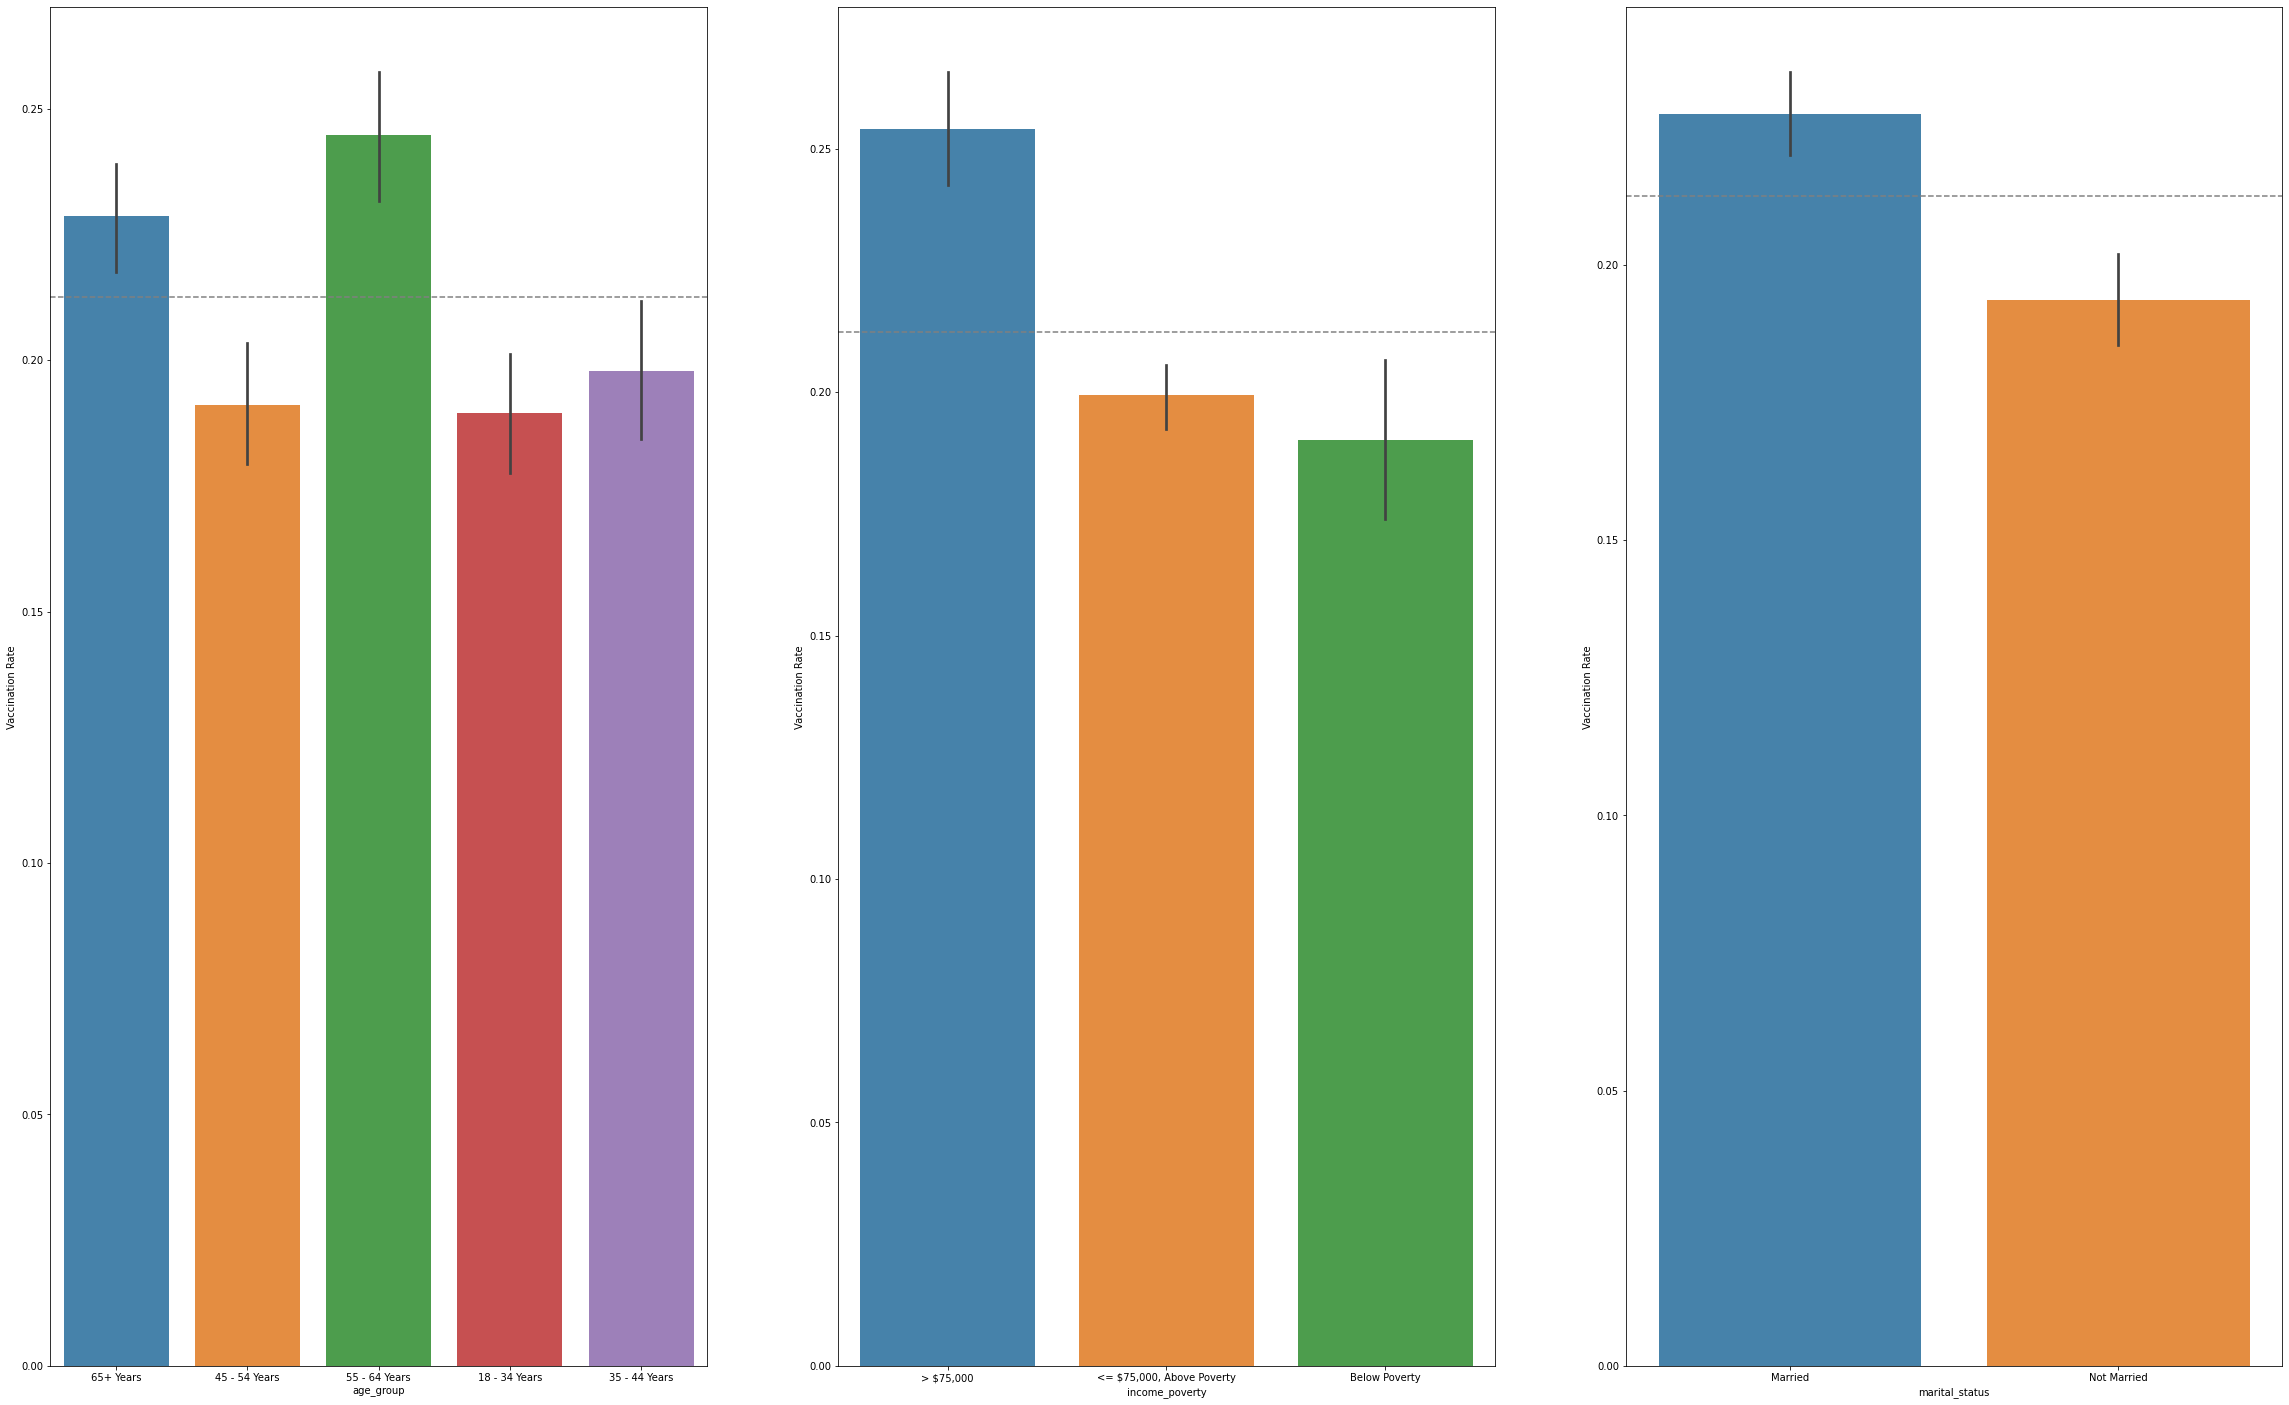

In [13]:
features = ['age_group', 'income_poverty', 'marital_status']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(40,25))

vaccination_rate = h1n1_train.h1n1_vaccine.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'h1n1_vaccine', data=h1n1_train, ax=ax[i], alpha=.9)
    ax[i].set_ylabel('Vaccination Rate')
    ax[i].axhline(vaccination_rate, ls='--', color='grey')

### Keytakeaway^^
- People who are over the age of 55 who make more than 75k a year, and who are marriess get this vaccine above the average vaccination rate

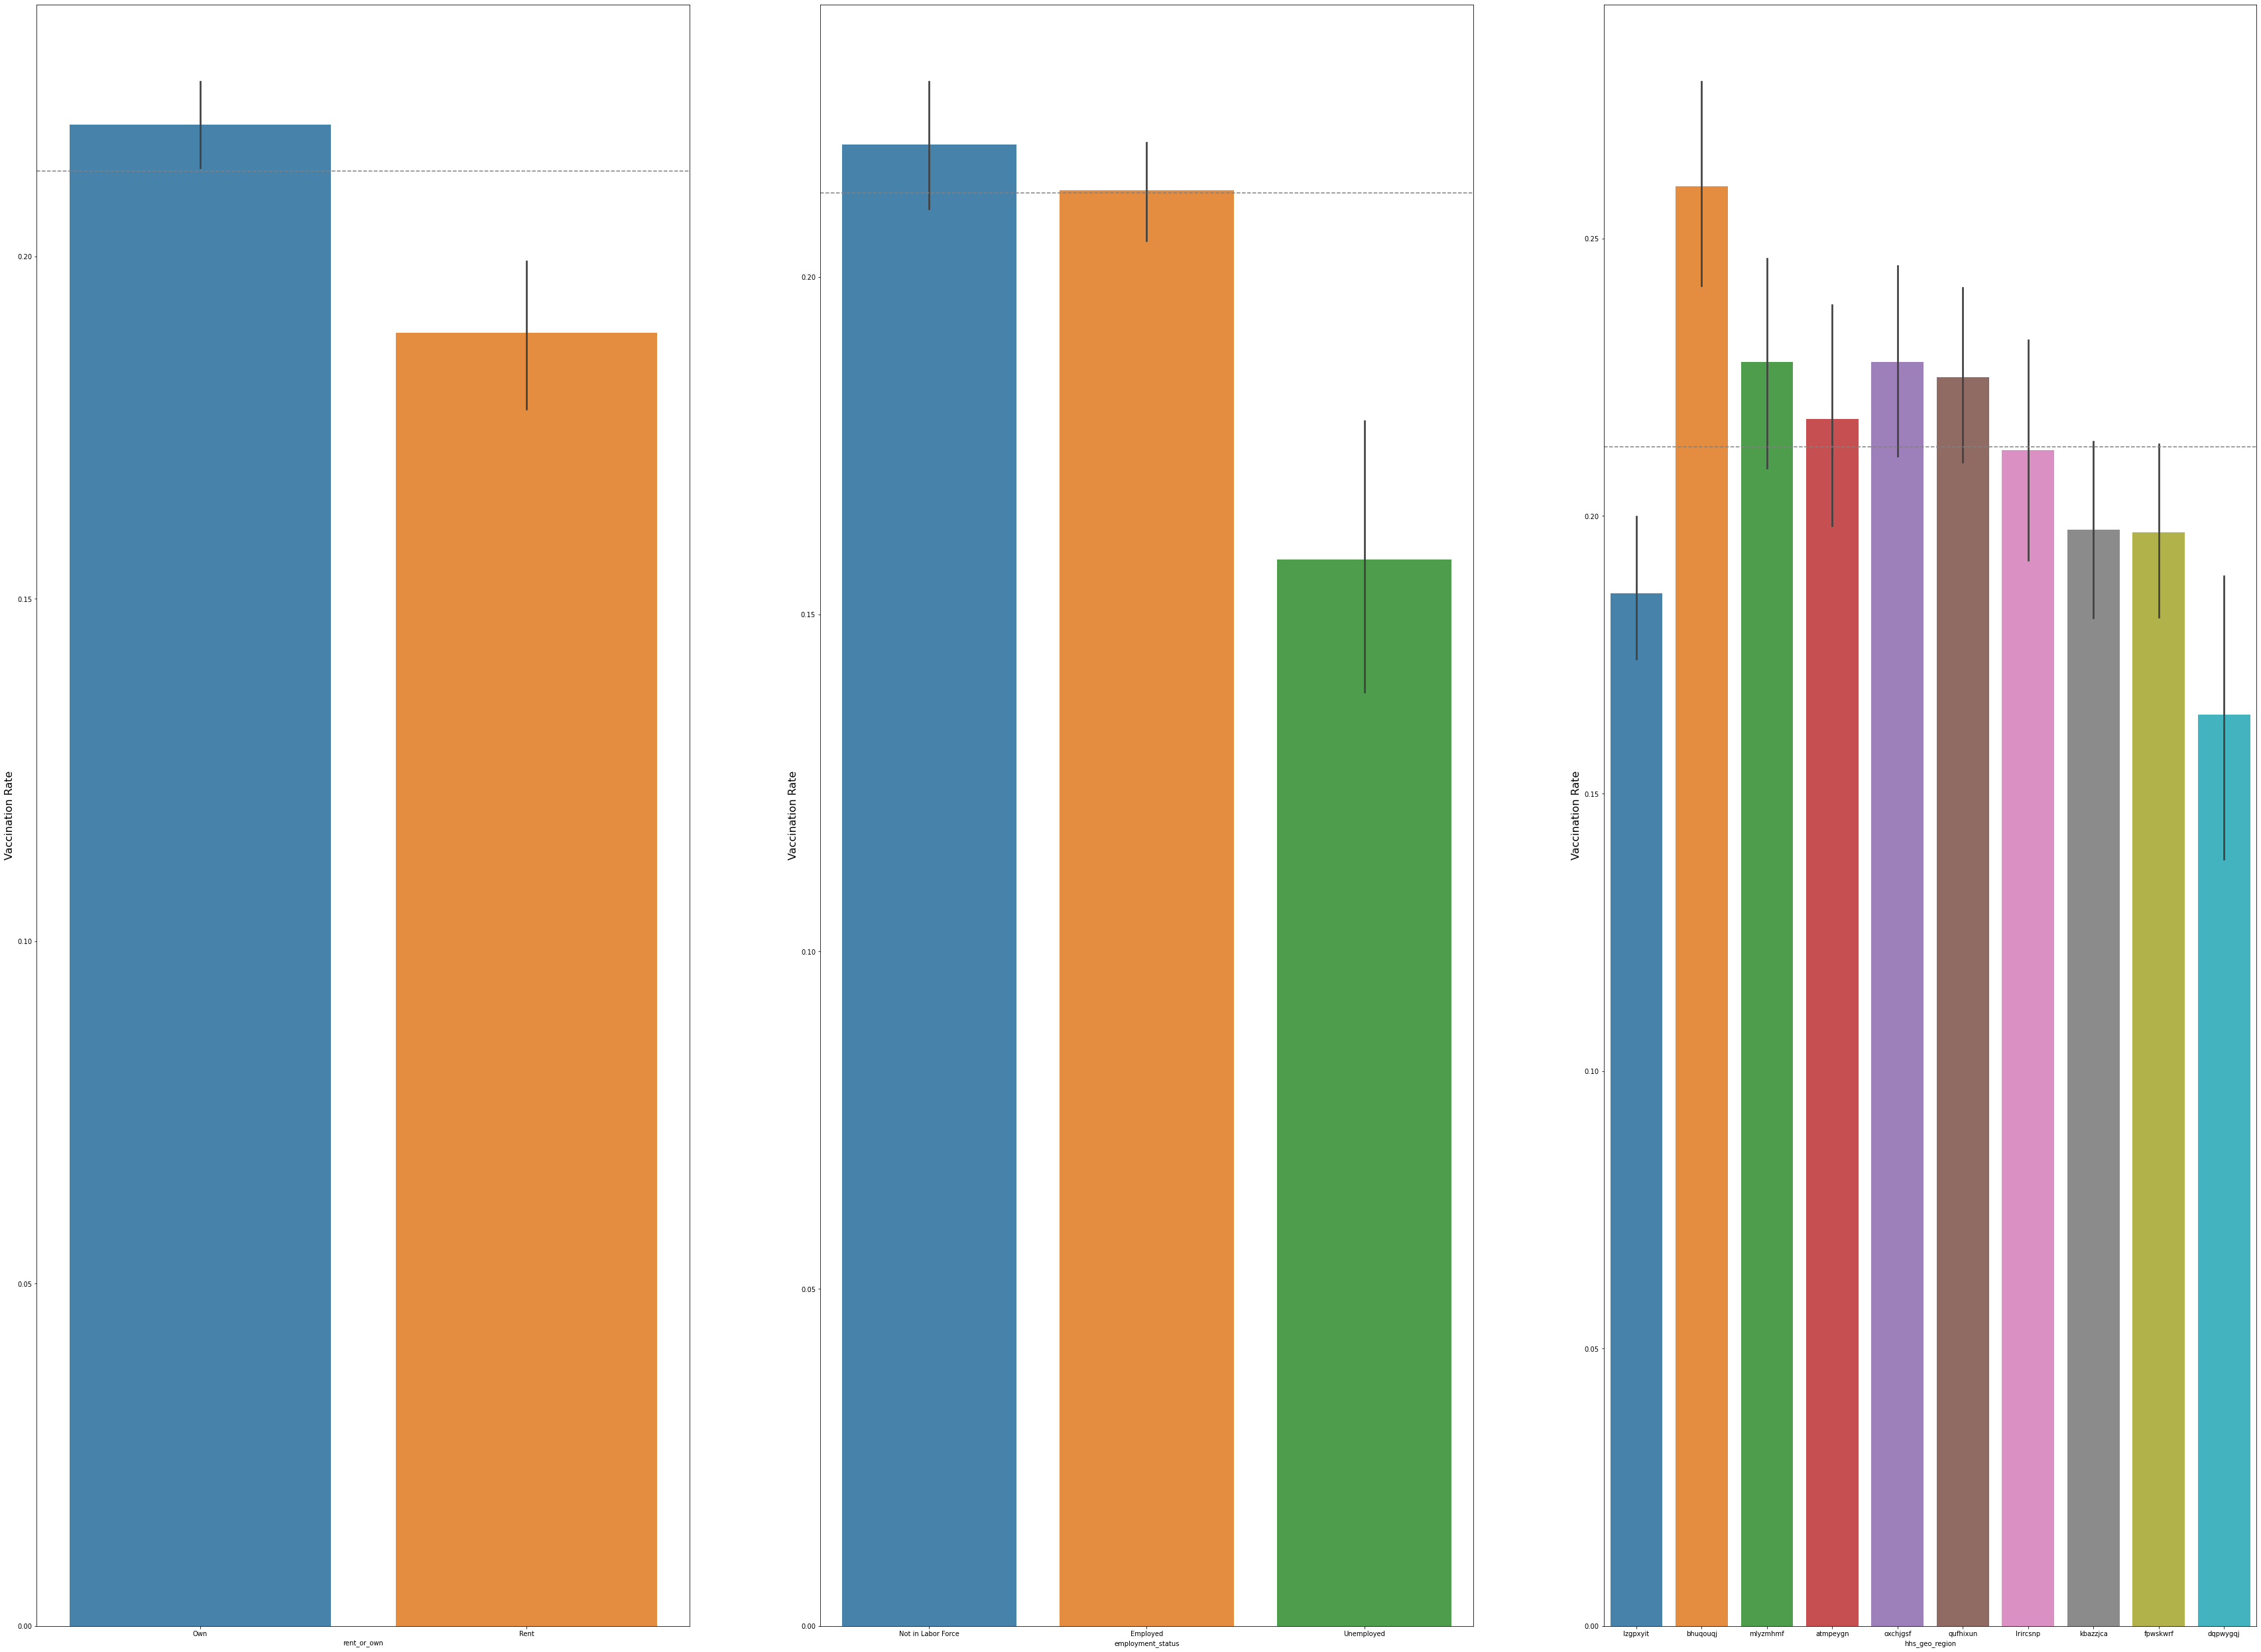

In [14]:
features = ['rent_or_own', 'employment_status', 'hhs_geo_region']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(60,45))

vaccination_rate = h1n1_train.h1n1_vaccine.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'h1n1_vaccine', data=h1n1_train, ax=ax[i], alpha=.9)
    ax[i].set_ylabel('Vaccination Rate', fontsize = 16.0)
    ax[i].axhline(vaccination_rate, ls='--', color='grey')

### Keytakeaway^^
- People who own their home, who are not in the labor force, and who live in five specific areas are have a higher than average vaccination rate

## Hypothesis Testing

Lest start by establishing a coonfidence level. Essentially, in order for something to be declared statstically significant, it must have a confidence level of 95%

alpha ($\alpha$): 1 - confidence level (95% confidence level -> $\alpha = .05$)

Is whether or not a person gets the H1N1 shot independent of their opinion of their risk of getting the disease?

### First Hypothesis:
- $H_0$: Getting the H1N11 flu shot is independent of their opinion of risk of getting the flu
- $H_a$: Getting the H1N11 flu shot is dependent on their opinion on risk of getting the flu

In [15]:
observed = pd.crosstab(h1n1_train.h1n1_vaccine, h1n1_train.opinion_h1n1_risk)

In [16]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[5919 6818  741 2667  681]
 [ 580 1401  163 1680  715]]
---
Expected

[[5118.28570091 6472.87123801  711.9449567  3423.47868008 1099.41942429]
 [1380.71429909 1746.12876199  192.0550433   923.52131992  296.58057571]]
---

chi^2 = 2218.1825
p     = 0.0000


In [17]:
alpha = .05

In [18]:
if p < alpha:
    print(f'''
        Because p ({p:.4f}) is less than alpha ({alpha:.2f}), we reject the null hypothesis.
        This means that the chances of observing the relationship between 
        opinion and vaccine status due to chance are slim. 
        ''')
else:
    print(f'''Because p ({p:.4f}) is greater than alpha ({alpha:.2f}), we fail to reject the null hypothesis.
        This means there is a statistically significant probability of observing the relationship between 
        opinion and vaccine status due to chance. 
        ''')


        Because p (0.0000) is less than alpha (0.05), we reject the null hypothesis.
        This means that the chances of observing the relationship between 
        opinion and vaccine status due to chance are slim. 
        


In [19]:
#Create a function that takes in the h1n1 training set and creates a heatmap
def opinion_h1n1_status(h1n1_train):
    plt.rc('figure', figsize=(13, 10))
    plt.rc('font', size=13)
    plt.title('Opinion of H1N1 Risk and Vaccine Status')
    ctab = pd.crosstab(h1n1_train.h1n1_vaccine, h1n1_train.opinion_h1n1_risk, normalize=True)
    sns.heatmap(ctab, annot=True, cmap='Purples', fmt='.1%')
    

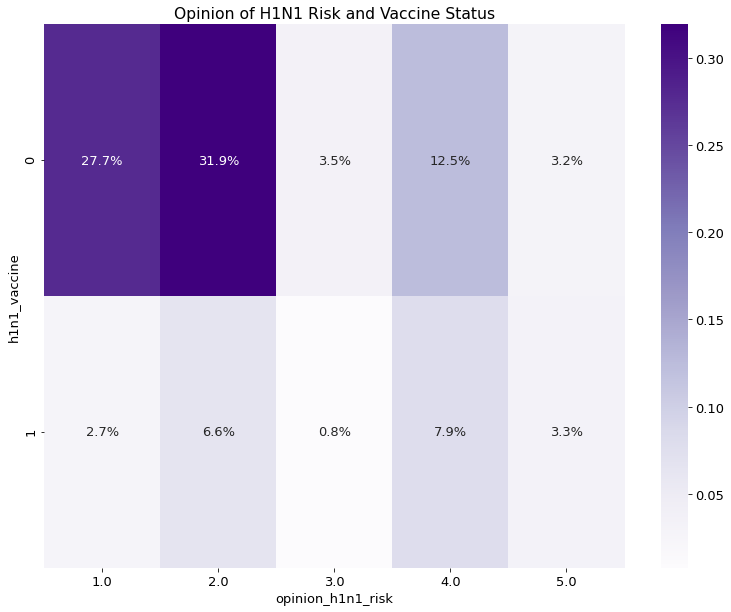

In [20]:
opinion_h1n1_status(h1n1_train)

### Key Takeaway^^

Based on this quick crosstab, it looks like people who have a low opion of their risk of getting sick with h1n1 are less likely too have gotten the vaccine. However, those who had a high opion of their risk of getting sick with h1n1 don't overwhelmingly recieve the vaccine. Interesting

In [21]:
# Subset data to only have opinion
continuous_h1n1 = h1n1_train[['h1n1_concern',
                             'h1n1_knowledge',
                             'behavioral_antiviral_meds',
                             'behavioral_avoidance',
                             'behavioral_face_mask',
                             'behavioral_wash_hands',
                             'behavioral_large_gatherings',
                             'behavioral_outside_home',
                             'behavioral_touch_face',
                             'doctor_recc_h1n1',
                             'chronic_med_condition',
                             'child_under_6_months',
                             'health_worker',
                             'health_insurance',
                             'opinion_h1n1_vacc_effective',
                             'opinion_h1n1_risk',
                             'opinion_h1n1_sick_from_vacc',
                             'h1n1_vaccine']]

In [22]:
continuous_h1n1

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,h1n1_vaccine
respondent_id,,,,,,,,,,,,,,,,,,
22067,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,2.0,0
2876,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,4.0,5.0,0
22939,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0,4.0,2.0,0
4154,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,1.0,0
23434,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,0
4285,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,0
14877,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,1.0,0


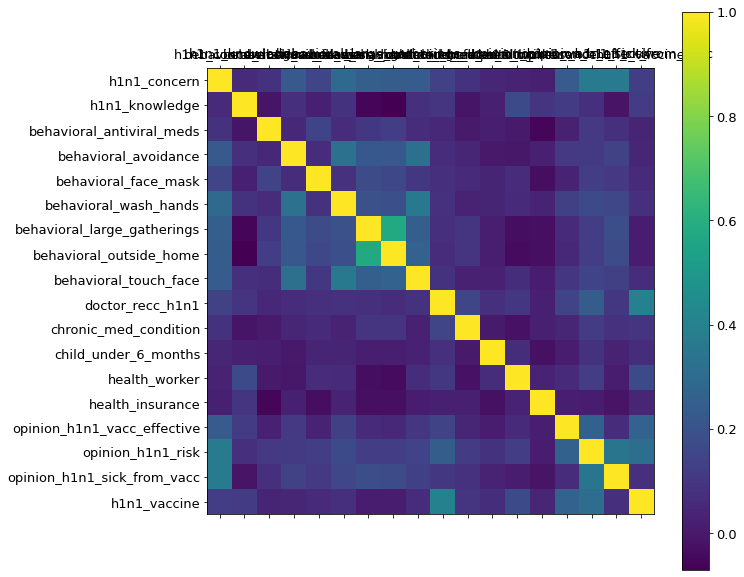

<Figure size 720x720 with 0 Axes>

In [23]:
plt.matshow(continuous_h1n1.corr())
plt.xticks(range(len(continuous_h1n1.columns)), continuous_h1n1.columns)
plt.yticks(range(len(continuous_h1n1.columns)), continuous_h1n1.columns)
plt.colorbar()
plt.figure(figsize = (10.0, 10.0))
plt.show()


### Second Hypothesis:
- $H_0$: Getting the H1N11 flu shot is independent of their behaviour outside the home
- $H_a$: Getting the H1N11 flu shot is dependent on their behaviour outside the home

In [24]:
x = h1n1_train.doctor_recc_h1n1
y = h1n1_train.h1n1_vaccine

In [25]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.40035116365389367, 0.0)

Based on the pearson's r test, it looks like there's a fairly strong correlation between the h1n1 vaccine status and whether the doctor recommends getting it. 

# Feature Engineering

I'll create some boolean columns for the features I think have the most relevance for modeling just to condense and make things easier.
- Features to be made into boolean values:
> - college_graduate, age_group_55_-_64_years, age_group_65+_years, income_poverty_>_75,000, encoded_marital_status, hhs_geo_region_bhuqouqj, hhs_geo_region_dqpwygqj, hhs_geo_region_fpwskwrf, hhs_geo_region_kbazzjca, hhs_geo_region_lrircsnp, hhs_geo_region_lzgpxyit

In [26]:
h1n1_train['graduated_college'] = h1n1_train['education_college_graduate'] > 0
h1n1_train['age_55_and_up'] = h1n1_train[['age_group_55_-_64_years', 'age_group_65+_years']].sum(axis=1) > 0
h1n1_train['over_75k'] = h1n1_train['income_poverty_>_$75,000'] > 0
h1n1_train['married'] = h1n1_train['encoded_marital_status'] > 0
h1n1_train['relevant_geography'] = h1n1_train[['hhs_geo_region_bhuqouqj', 'hhs_geo_region_dqpwygqj', 
                                     'hhs_geo_region_fpwskwrf', 'hhs_geo_region_kbazzjca', 
                                     'hhs_geo_region_lrircsnp', 'hhs_geo_region_lzgpxyit']].sum(axis = 1)> 0

Let's confirm the added columns

In [27]:
h1n1_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,encoded_employment_status,encoded_rent_or_own,encoded_marital_status,encoded_sex,age_group_18_-_34_years,age_group_35_-_44_years,age_group_45_-_54_years,age_group_55_-_64_years,age_group_65+_years,education_12_years,education_<_12_years,education_college_graduate,education_some_college,"income_poverty_<=_$75,000,_above_poverty","income_poverty_>_$75,000",income_poverty_below_poverty,race_black,race_hispanic,race_other_or_multiple,race_white,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,h1n1_concern_scaled,h1n1_knowledge_scaled,opinion_h1n1_vacc_effective_scaled,opinion_h1n1_risk_scaled,opinion_h1n1_sick_from_vacc_scaled,opinion_seas_vacc_effective_scaled,opinion_seas_risk_scaled,opinion_seas_sick_from_vacc_scaled,household_adults_scaled,household_children_scaled,graduated_college,age_55_and_up,over_75k,married,relevant_geography
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
22067,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,2.0,4.0,2.0,2.0,65+ Years,College Graduate,White,Male,"> $75,000",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Not Principle City",1.0,0.0,0,1,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.5,0.75,0.00,0.25,0.75,0.25,0.25,0.333333,0.000000,True,True,True,False,True
2876,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,5.0,4.0,5.0,5.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Employed,bhuqouqj,"MSA, Principle City",0.0,0.0,0,0,1,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.5,1.00,0.75,1.00,1.00,0.75,0.25,0.000000,0.000000,False,True,False,True,True
22939,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,3.0,4.0,2.0,4.0,2.0,2.0,45 - 54 Years,College Graduate,Other or Multiple,Female,"> $75,000",Married,Rent,Employed,mlyzmhmf,Non-MSA,2.0,1.0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.5,0.50,0.75,0.25,0.75,0.25,0.25,0.666667,0.333333,True,False,True,False,False
4154,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,1.0,5.0,1.0,1.0,45 - 54 Years,< 12 Years,Other or Multiple,Male,"> $75,000",Married,Rent,Employed,mlyzmhmf,"MSA, Principle City",1.0,0.0,0,0,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.5,0.75,0.00,0.00,1.00,0.00,0.00,0.333333,0.000000,False,False,True,False,False
23434,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,0,1,0,1,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.75,0.25,0.25,0.75,0.75,0.25,0.333333,0.000000,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

Looks like everything is added appropriately

## Seasonal Flu Vaccine Exploration

Text(0.5, 1.0, "Distirbution of Patients' Vaccine Status")

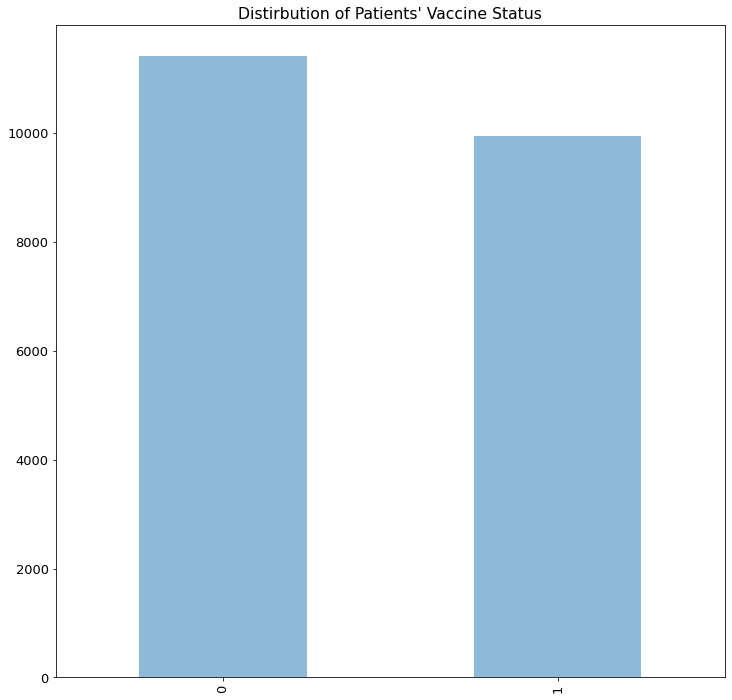

In [28]:
#Plot the distribution on of vaccine status
plt.figure(figsize=(12,12))
seasonal_train.seasonal_vaccine.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Distirbution of Patients' Vaccine Status")

### Key Takeaway ^^
- The seasonal flu vaccine 

In [29]:
#Create a function that takes in the h1n1 training set and creates a heatmap
def opinion_seasonal_status(train):
    plt.rc('figure', figsize=(13, 10))
    plt.rc('font', size=13)
    plt.title('Opinion of Seasoonal Risk and Vaccine Status')
    ctab = pd.crosstab(train.seasonal_vaccine, train.opinion_seas_risk, normalize=True)
    sns.heatmap(ctab, annot=True, cmap='Purples', fmt='.1%')

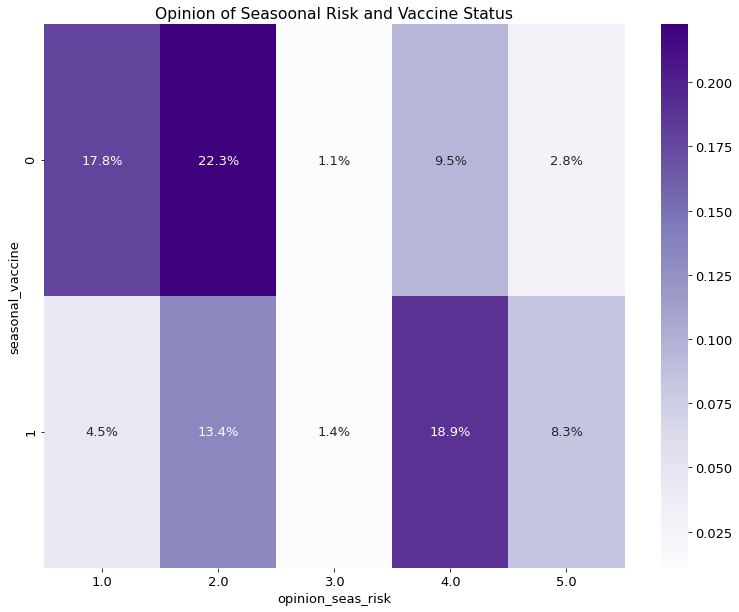

In [30]:
opinion_seasonal_status(seasonal_train)

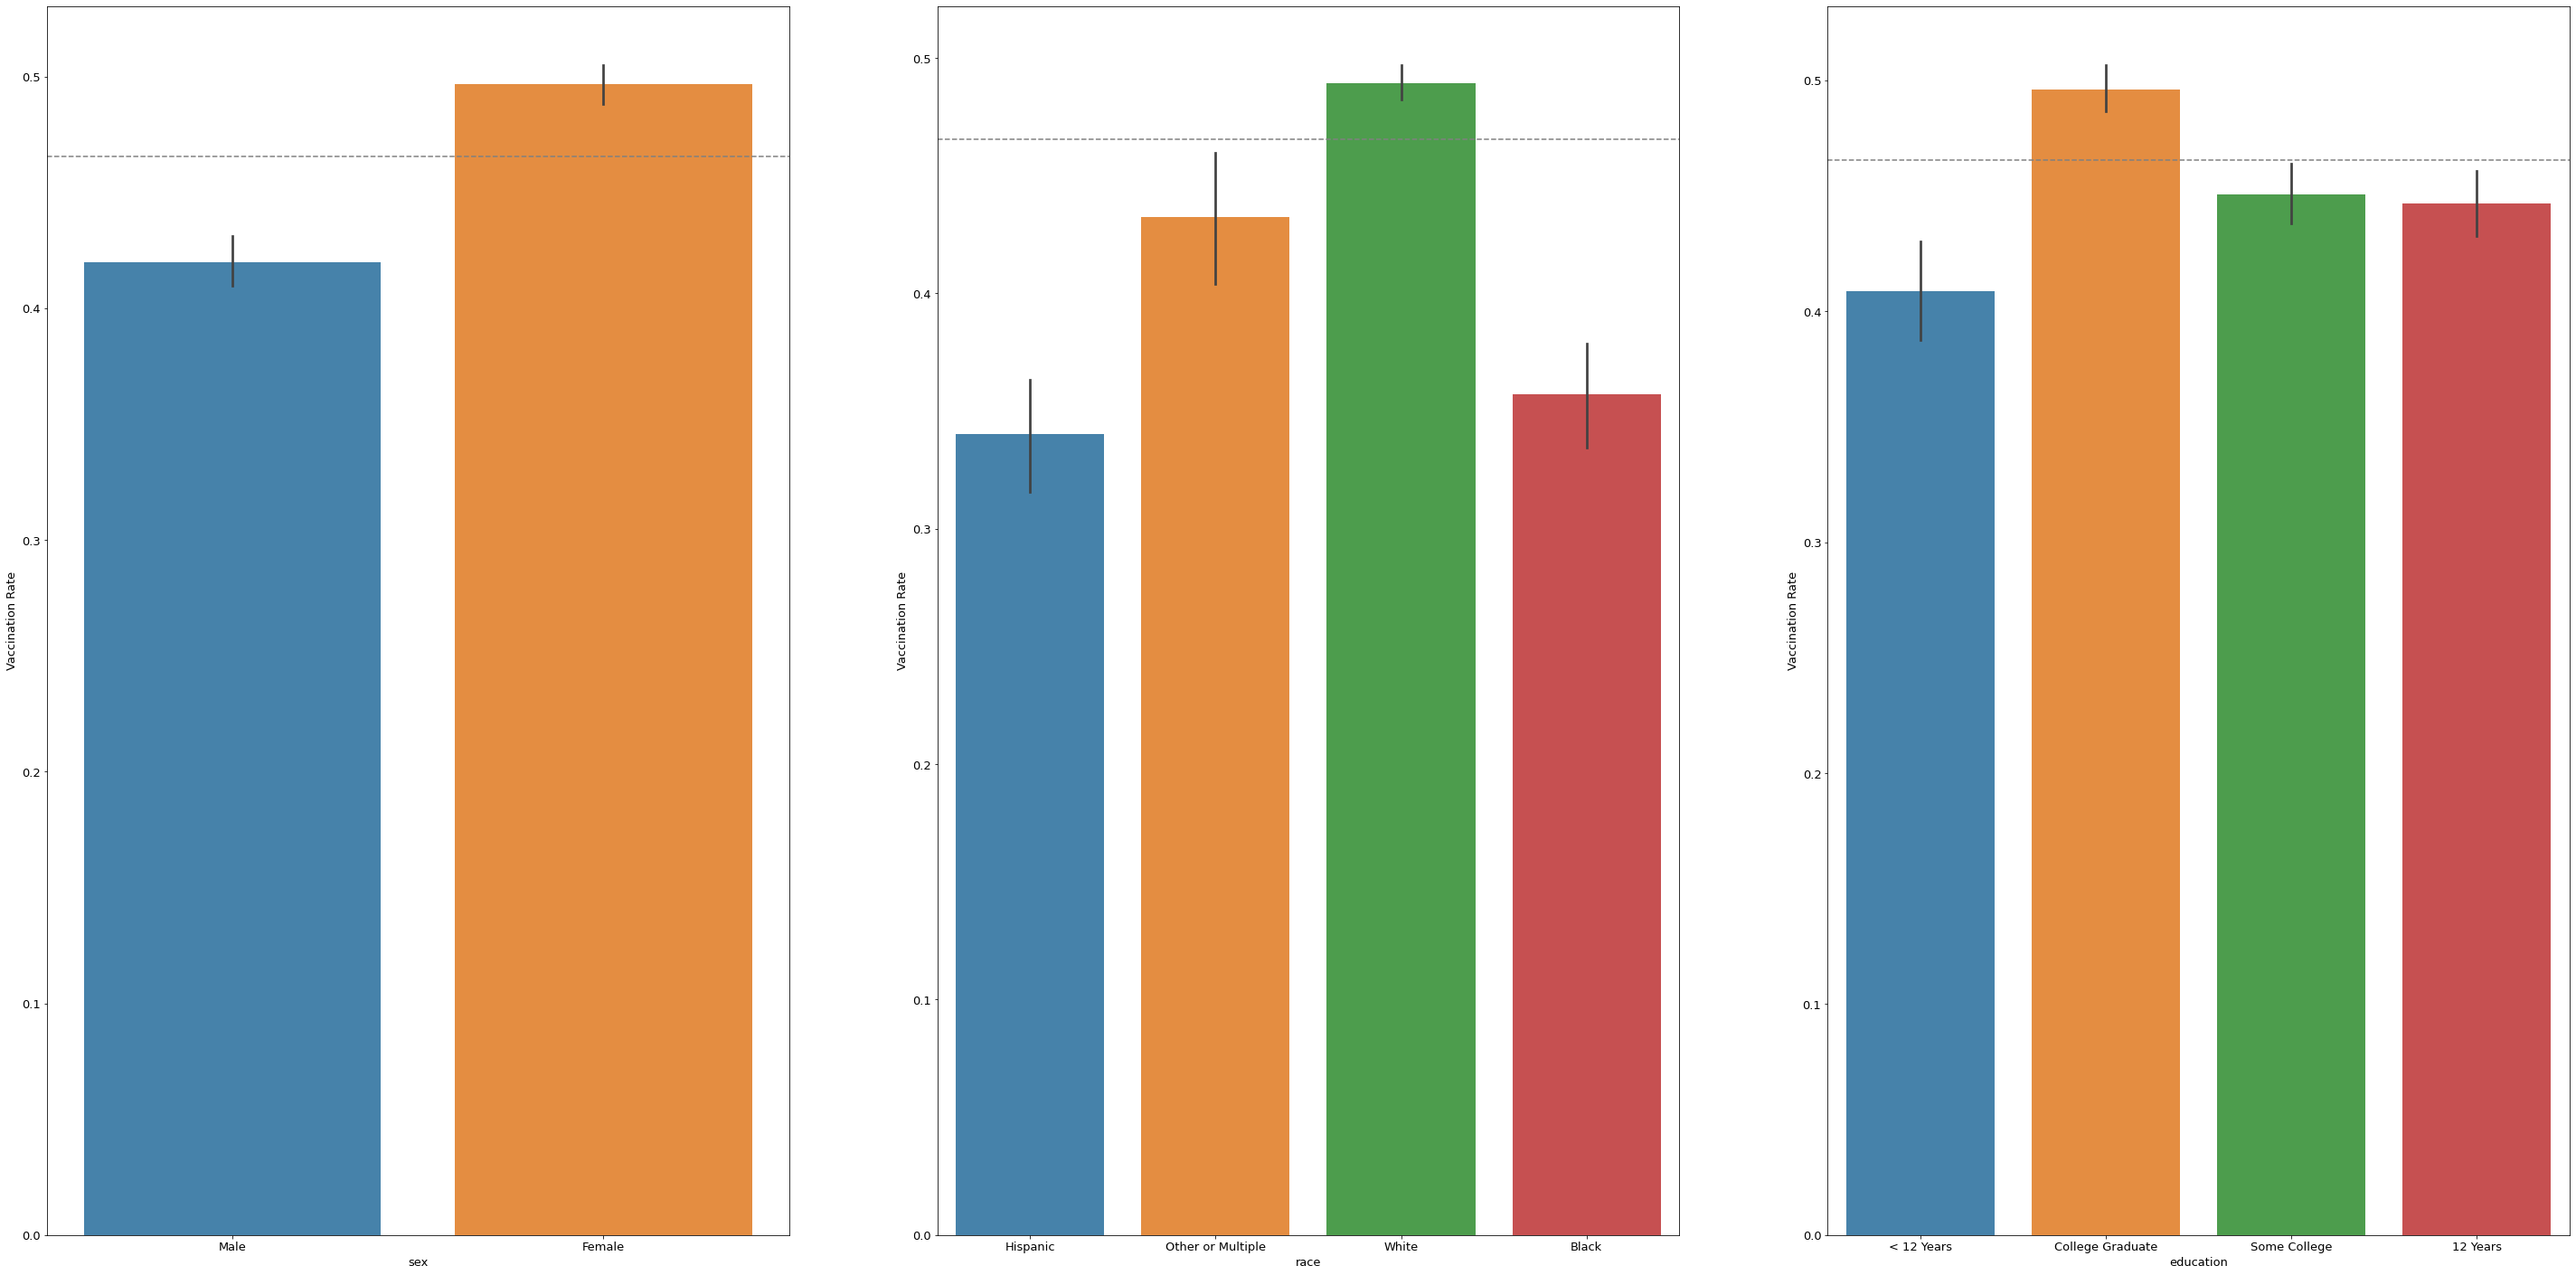

In [31]:
features = ['sex', 'race', 'education']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(50,25))

vaccination_rate = seasonal_train.seasonal_vaccine.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'seasonal_vaccine', data=seasonal_train, ax=ax[i], alpha=.9)
    ax[i].set_ylabel('Vaccination Rate')
    ax[i].axhline(vaccination_rate, ls='--', color='grey')

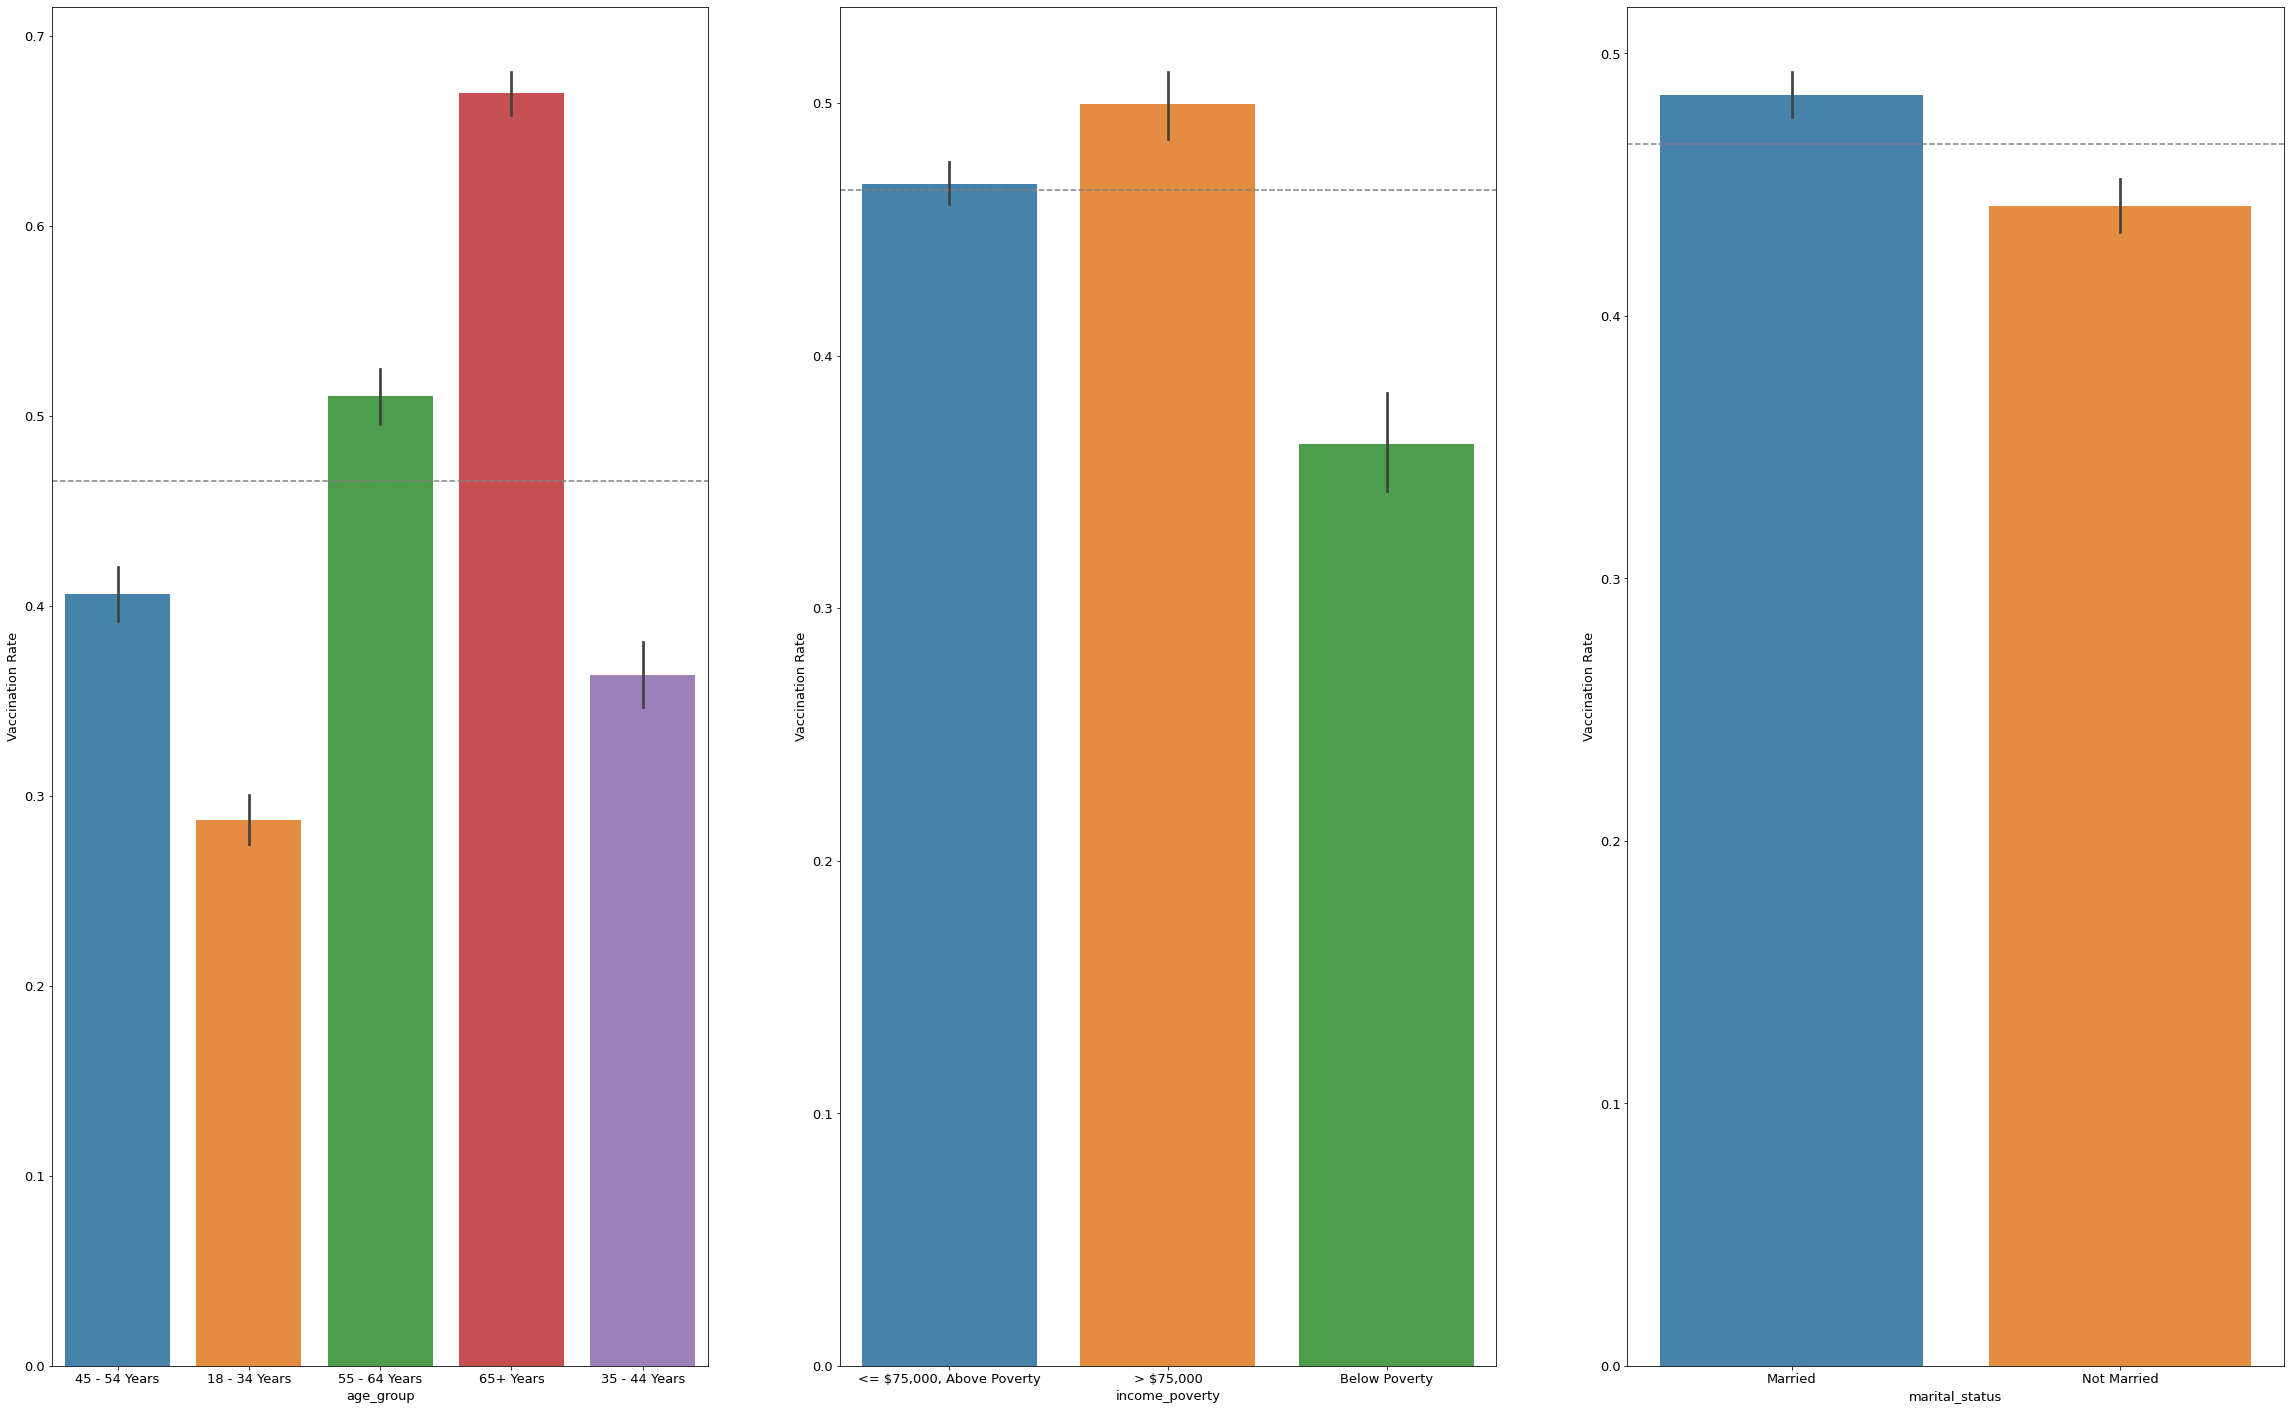

In [32]:
features = ['age_group', 'income_poverty', 'marital_status']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(40,25))

vaccination_rate = seasonal_train.seasonal_vaccine.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'seasonal_vaccine', data=seasonal_train, ax=ax[i], alpha=.9)
    ax[i].set_ylabel('Vaccination Rate')
    ax[i].axhline(vaccination_rate, ls='--', color='grey')

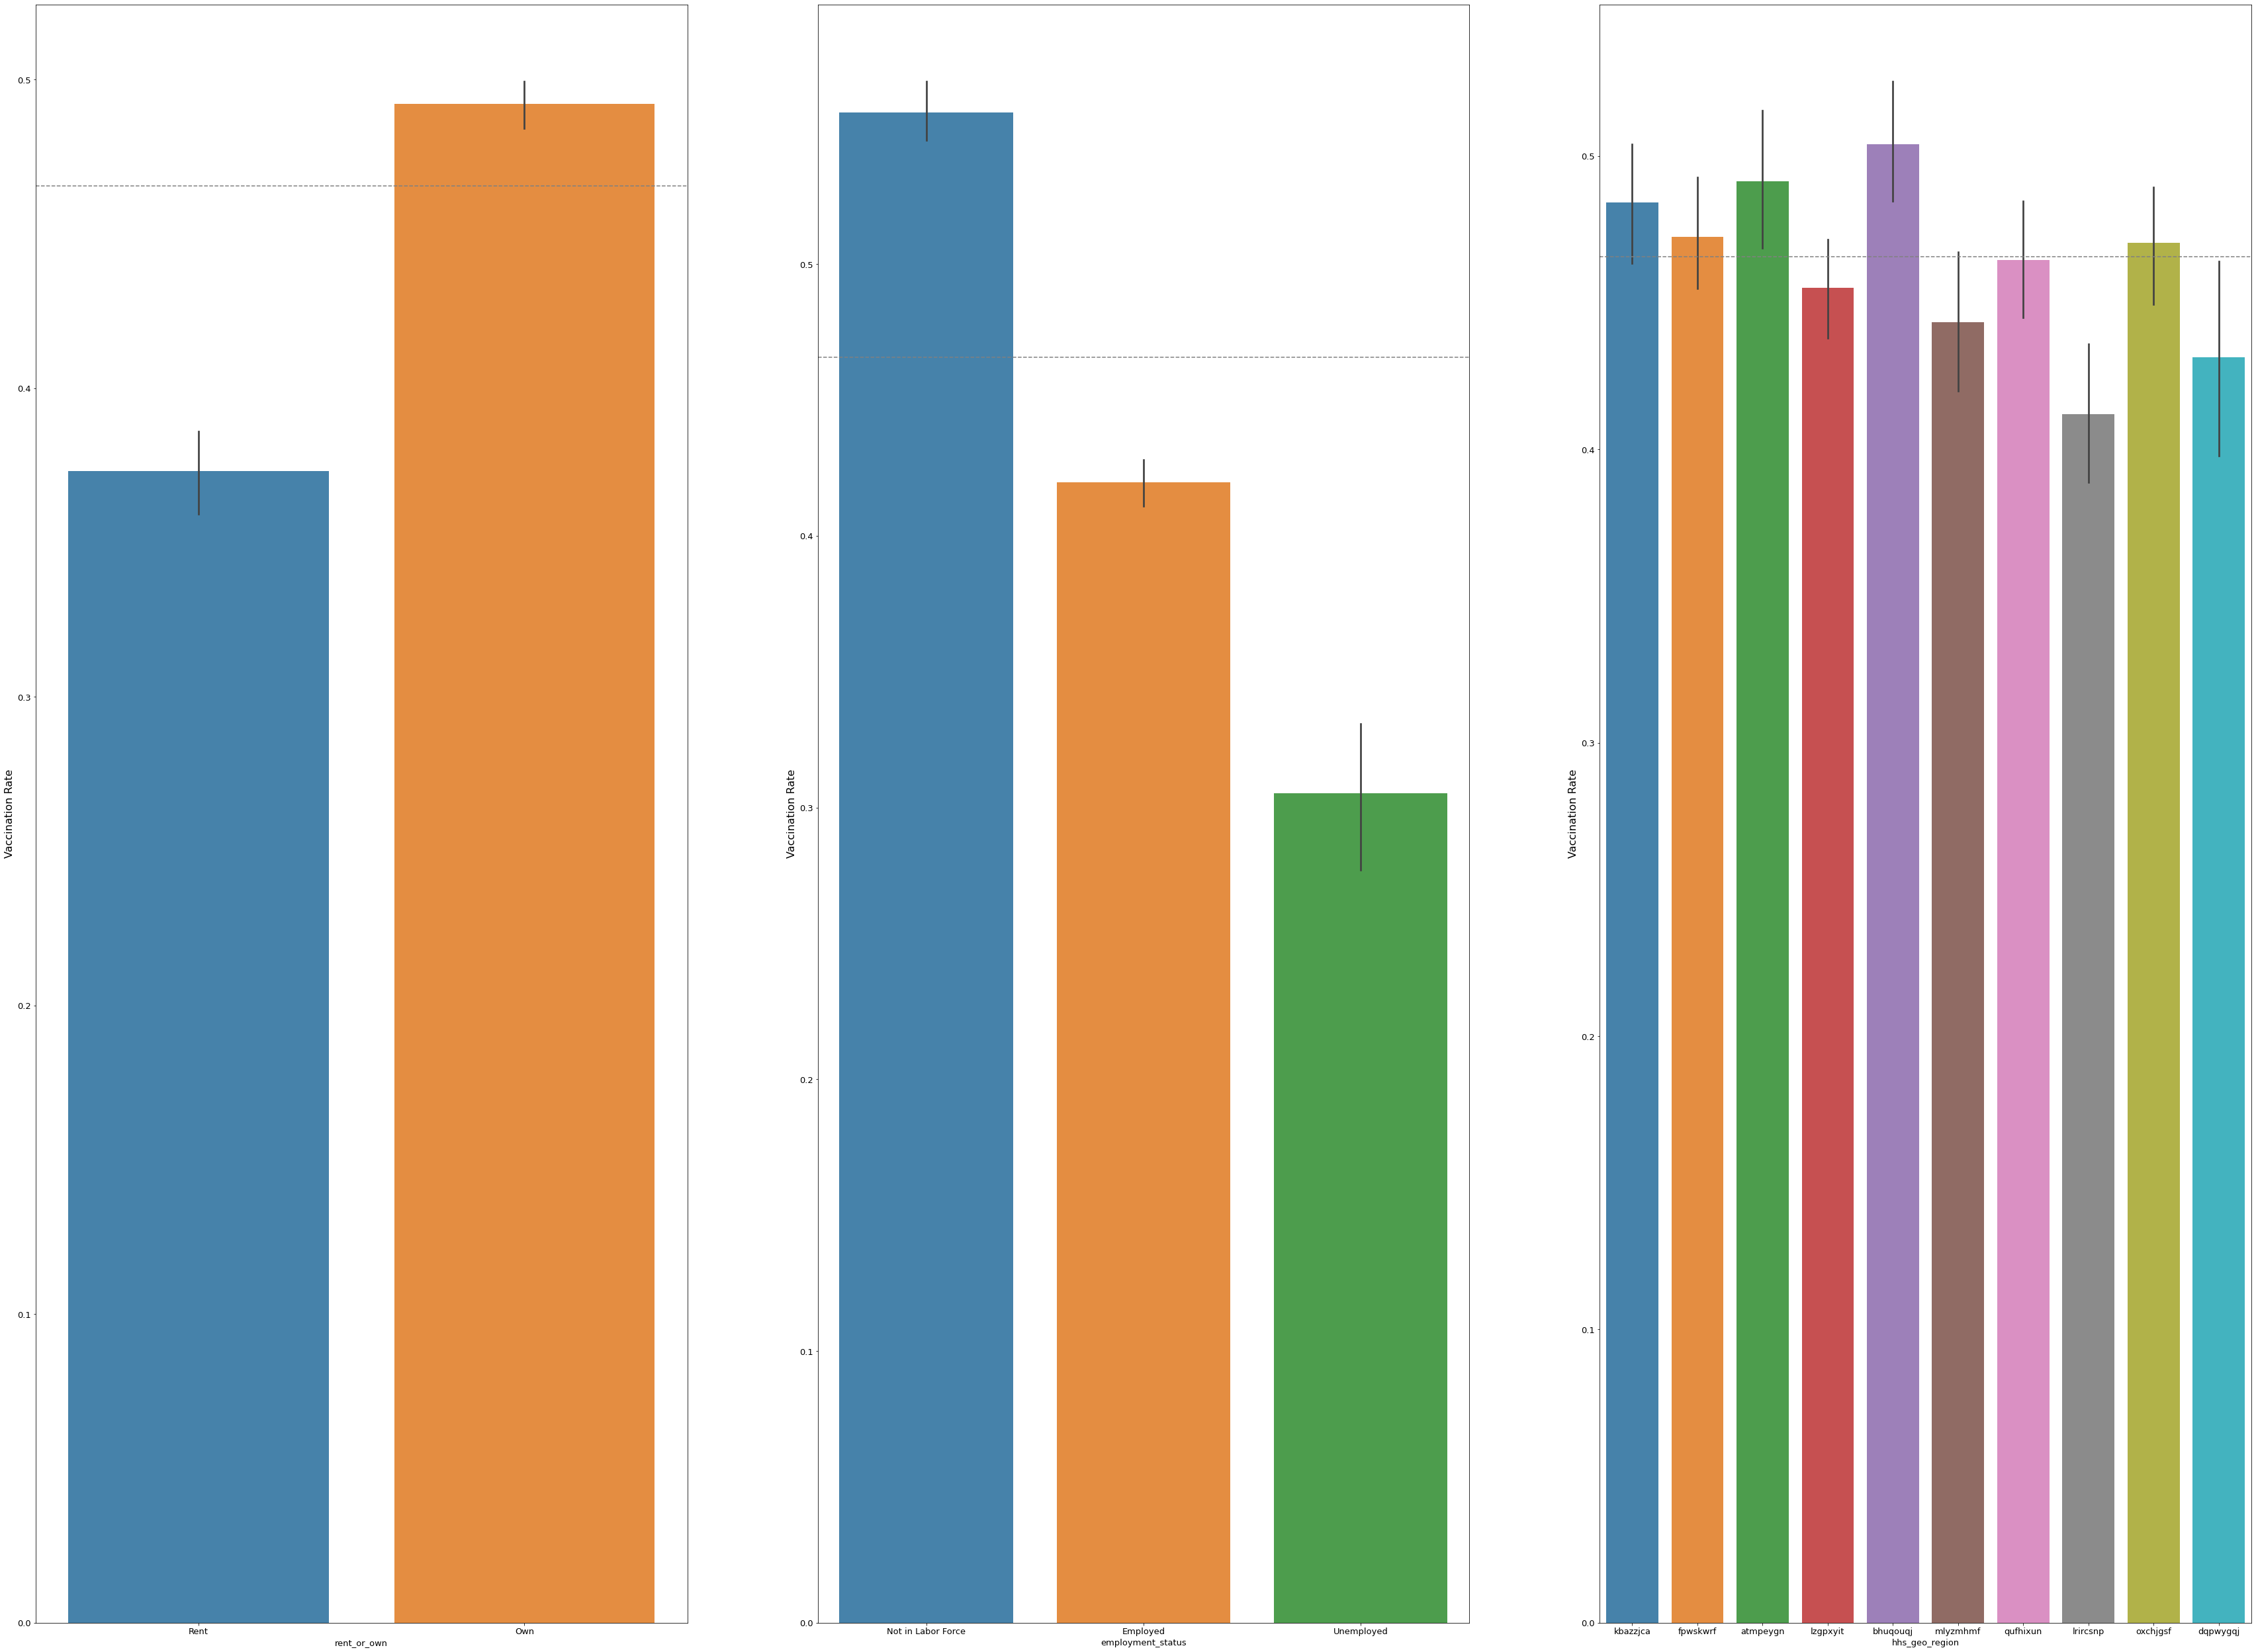

In [33]:
features = ['rent_or_own', 'employment_status', 'hhs_geo_region']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(60,45))

vaccination_rate = seasonal_train.seasonal_vaccine.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'seasonal_vaccine', data=seasonal_train, ax=ax[i], alpha=.9)
    ax[i].set_ylabel('Vaccination Rate', fontsize = 16.0)
    ax[i].axhline(vaccination_rate, ls='--', color='grey')

In [34]:
seasonal_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,seasonal_vaccine,encoded_employment_status,encoded_rent_or_own,encoded_marital_status,encoded_sex,age_group_18_-_34_years,age_group_35_-_44_years,age_group_45_-_54_years,age_group_55_-_64_years,age_group_65+_years,education_12_years,education_<_12_years,education_college_graduate,education_some_college,"income_poverty_<=_$75,000,_above_poverty","income_poverty_>_$75,000",income_poverty_below_poverty,race_black,race_hispanic,race_other_or_multiple,race_white,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,h1n1_concern_scaled,h1n1_knowledge_scaled,opinion_h1n1_vacc_effective_scaled,opinion_h1n1_risk_scaled,opinion_h1n1_sick_from_vacc_scaled,opinion_seas_vacc_effective_scaled,opinion_seas_risk_scaled,opinion_seas_sick_from_vacc_scaled,household_adults_scaled,household_children_scaled
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
22862,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,45 - 54 Years,< 12 Years,Hispanic,Male,"<= $75,000, Above Poverty",Married,Rent,Not in Labor Force,kbazzjca,Non-MSA,0.0,0.0,0,1,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.00,0.00,0.00,0.00,0.25,0.00,0.000000,0.000000
20471,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,2.0,5.0,4.0,1.0,18 - 34 Years,College Graduate,Other or Multiple,Male,"> $75,000",Not Married,Own,Not in Labor Force,fpwskwrf,"MSA, Not Principle City",2.0,0.0,0,1,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.75,0.75,0.25,1.00,0.75,0.00,0.666667,0.000000
11401,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,5.0,5.0,4.0,4.0,4.0,18 - 34 Years,< 12 Years,Hispanic,Female,Below Poverty,Married,Rent,Not in Labor Force,atmpeygn,"MSA, Not Principle City",1.0,2.0,0,1,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.5,1.00,1.00,1.00,0.75,0.75,0.75,0.333333,0.666667
15821,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,2.0,5.0,5.0,4.0,55 - 64 Years,College Graduate,Other or Multiple,Female,"> $75,000",Not Married,Rent,Not in Labor Force,lzgpxyit,"MSA, Principle City",0.0,0.0,1,1,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,1.0,0.75,0.00,0.25,1.00,1.00,0.75,0.000000,0.000000
3711,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,5.0,4.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,1,0,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.50,0.00,0.00,1.00,0.75,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16297,1.0,1.0,0.0,1.0,0.0,1.

In [35]:
# Subset data to only have opinion
continuous_seasonal = seasonal_train[[
                             'behavioral_antiviral_meds',
                             'behavioral_avoidance',
                             'behavioral_face_mask',
                             'behavioral_wash_hands',
                             'behavioral_large_gatherings',
                             'behavioral_outside_home',
                             'behavioral_touch_face',
                             'doctor_recc_seasonal',
                             'chronic_med_condition',
                             'child_under_6_months',
                             'health_worker',
                             'health_insurance',
                             'opinion_seas_vacc_effective',
                             'opinion_seas_risk',
                             'opinion_seas_sick_from_vacc',
                             'seasonal_vaccine']]

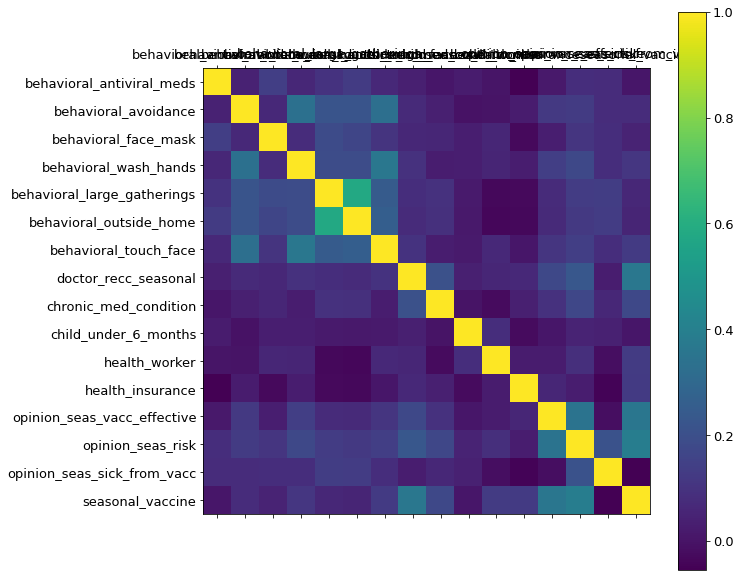

<Figure size 720x720 with 0 Axes>

In [36]:
plt.matshow(continuous_seasonal.corr())
plt.xticks(range(len(continuous_seasonal.columns)), continuous_seasonal.columns)
plt.yticks(range(len(continuous_seasonal.columns)), continuous_seasonal.columns)
plt.colorbar()
plt.figure(figsize = (10.0, 10.0))
plt.show()